In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import joblib as jb
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('five_dataset.csv')
df.head()

,experience_years,certifications,performance_rating,salary_lpa
0,0,3,3.3,5.34
1,8,1,3.5,13.90
2,0,2,3.8,7.64
3,0,2,4.8,9.47
4,6,4,3.4,12.62


In [3]:
x = df[['experience_years', 'certifications', 'performance_rating']].values.reshape(-1,3)
y = df['salary_lpa'].values.reshape(-1,1)

sc = MinMaxScaler()
x_norm = sc.fit_transform(x)

yn = y.min()
yx = y.max()
y = (y-yn)/(yx-yn)

jb.dump(sc, 'scaler_five.pkl')


['scaler_five.pkl']

In [4]:
def salary(exp, certi, rating):
    model_path = 'five.keras'
    sc = jb.load('scaler_five.pkl')
    inp = np.array([[exp, certi, rating]])
    inp = sc.transform(inp)
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else: 
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(3,), activation='relu'),
                                    keras.layers.Dense(16, activation='relu'),
                                    keras.layers.Dense(units=1)])
        model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
        hist = model.fit(x_norm, y, epochs=500)
        model.save('five.keras')
        pred = model.predict(x_norm)
        lv = hist.history['loss']
        
        plt.figure()
        plt.plot(lv)
        plt.grid(True)
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.title('loss values')
        plt.show()

        plt.figure()
        plt.scatter(y, pred, label='actual vs predicted', color='pink')
        plt.grid(True)
        plt.xlabel('actual')
        plt.ylabel('predicted')
        plt.legend()
        plt.title('Actual vs Predicted')
        plt.show()
    return model.predict(np.array(inp))[0][0]*(yx - yn)+yn

c:\Users\user\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.4513
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.4199
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3741
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3697
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.3145
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2848
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2666
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2380
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2036
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1697
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1414
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1299
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0917
Epoch 14/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0855
Epoch 15/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0716
Epoch 16/500
2/2 ━━

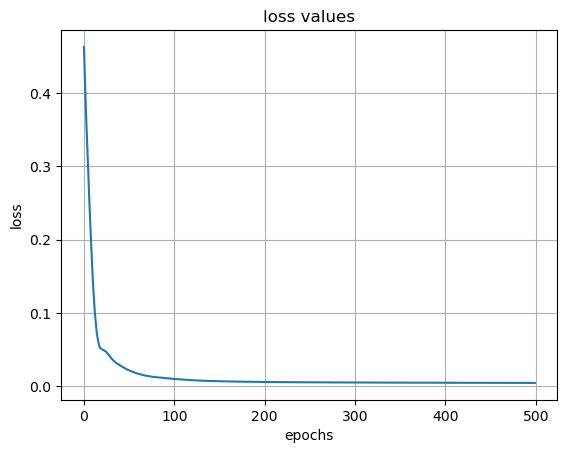

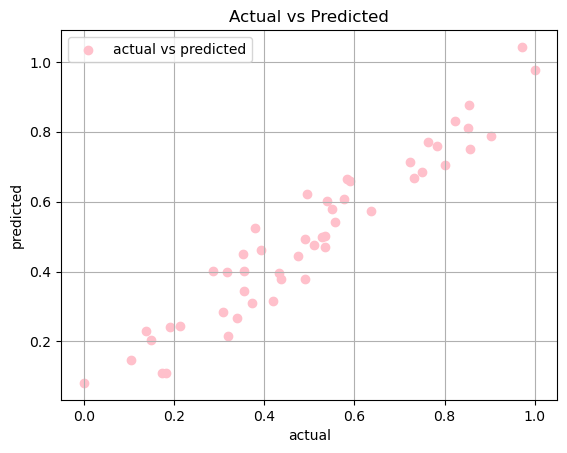

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
8.867961328327656
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
10.998653063774109
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
3.5640967420488594


In [5]:
print(salary(2, 1, 4.5))    # Expected: ~7.0 LPA
print(salary(5, 3, 3.8))    # Expected: ~8.5 LPA
print(salary(0, 0, 2.5))    # Expected: ~4.0 LPA
